In [ ]:
# Import packages
import pandas as pd
import numpy as np
import itertools
from collections import Counter

# Plots
import matplotlib.pyplot as plt
import pycountry
from countryinfo import CountryInfo
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import Dropdown, Output, VBox, Checkbox, HBox, Layout
from IPython.display import display, HTML
import ipywidgets as widgets

# Clustering
import hdbscan
from sklearn.cluster import HDBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Check for Missing Values and Duplicates

In [2]:
# Paths 2020 and 2024
csv_path2020_euroSciVoc = "./cordis-h2020projects-csv/euroSciVoc.csv"
csv_path2020_legalBasis = "./cordis-h2020projects-csv/legalBasis.csv"
csv_path2020_organization = "./cordis-h2020projects-csv/organization.csv"
csv_path2020_project = "./cordis-h2020projects-csv/project.csv"
csv_path2020_topics = "./cordis-h2020projects-csv/topics.csv"
csv_path2020_webItem = "./cordis-h2020projects-csv/webItem.csv"
csv_path2020_webLink = "./cordis-h2020projects-csv/webLink.csv"
csv_path2020_publication = "./cordis-h2020projects-csv/projectPublications2020.csv"

csv_path2024_euroSciVoc = "./cordis-HORIZONprojects-csv/euroSciVoc.csv"
csv_path2024_legalBasis = "./cordis-HORIZONprojects-csv/legalBasis.csv"
csv_path2024_organization = "./cordis-HORIZONprojects-csv/organization.csv"
csv_path2024_project = "./cordis-HORIZONprojects-csv/project.csv"
csv_path2024_topics = "./cordis-HORIZONprojects-csv/topics.csv"
csv_path2024_webItem = "./cordis-HORIZONprojects-csv/webItem.csv"
csv_path2024_webLink = "./cordis-HORIZONprojects-csv/webLink.csv"
csv_path2024_publication = "./cordis-HORIZONprojects-csv/projectPublications2024.csv"



In [3]:
## for horizon 2020 MISSING VALUES AND DUPLICATES

# Dataframes inlezen
df2020_euroSciVoc = pd.read_csv(csv_path2020_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_legalBasis = pd.read_csv(csv_path2020_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_organization = pd.read_csv(csv_path2020_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_project = pd.read_csv(csv_path2020_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_topics = pd.read_csv(csv_path2020_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webItem = pd.read_csv(csv_path2020_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webLink = pd.read_csv(csv_path2020_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_publication = pd.read_csv(csv_path2020_publication,delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2020_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2020_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2020_legalBasis.isnull().sum())
print("Duplicated rows:", df2020_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2020_organization.isnull().sum())
print("Duplicated rows:", df2020_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2020_project.isnull().sum())
print("Duplicated rows:", df2020_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2020_topics.isnull().sum())
print("Duplicated rows:", df2020_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2020_webItem.isnull().sum())
print("Duplicated rows:", df2020_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2020_webLink.isnull().sum())
print("Duplicated rows:", df2020_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2020_publication.isnull().sum())
print("Duplicated rows:", df2020_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2020_project.drop_duplicates(inplace=True)
df2020_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2020_organization.drop_duplicates(inplace=True)
df2020_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2020_euroSciVoc.drop_duplicates(inplace=True)
df2020_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2020_publication.drop_duplicates(inplace=True)
df2020_publication.dropna(subset=["projectID", "doi"], inplace= True)

=== euroSciVoc ===
Missing values:
 projectID                     0
euroSciVocCode                0
euroSciVocPath                0
euroSciVocTitle               0
euroSciVocDescription    114193
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                  0
legalBasis                 0
title                      0
uniqueProgrammePart    30399
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              23528
name                       0
shortName              40141
SME                      516
activityType             954
street                  1209
postCode                1986
city                     522
country                  264
nutsCode                 618
geolocation              232
organizationURL        62539
contactForm                0
contentUpdateDate          0
rcn                        0
order                   

In [4]:
## for horizon 2024
# Dataframes inlezen
df2024_euroSciVoc = pd.read_csv(csv_path2024_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_legalBasis = pd.read_csv(csv_path2024_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_organization = pd.read_csv(csv_path2024_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_project = pd.read_csv(csv_path2024_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_topics = pd.read_csv(csv_path2024_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webItem = pd.read_csv(csv_path2024_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webLink = pd.read_csv(csv_path2024_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_publication=pd.read_csv(csv_path2024_publication,  delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2024_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2024_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2024_legalBasis.isnull().sum())
print("Duplicated rows:", df2024_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2024_organization.isnull().sum())
print("Duplicated rows:", df2024_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2024_project.isnull().sum())
print("Duplicated rows:", df2024_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2024_topics.isnull().sum())
print("Duplicated rows:", df2024_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2024_webItem.isnull().sum())
print("Duplicated rows:", df2024_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2024_webLink.isnull().sum())
print("Duplicated rows:", df2024_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2024_publication.isnull().sum())
print("Duplicated rows:", df2024_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2024_project.drop_duplicates(inplace=True)
df2024_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2024_organization.drop_duplicates(inplace=True)
df2024_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2024_euroSciVoc.drop_duplicates(inplace=True)
df2024_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2024_publication.drop_duplicates(inplace=True)
df2024_publication.dropna(subset=["projectID", "doi"], inplace= True)


=== euroSciVoc ===
Missing values:
 projectID                    0
euroSciVocCode               0
euroSciVocPath               0
euroSciVocTitle              0
euroSciVocDescription    38789
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                 0
legalBasis                0
title                     0
uniqueProgrammePart    5171
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              15403
name                       0
shortName              25507
SME                      263
activityType              24
street                   300
postCode                 786
city                     263
country                   13
nutsCode                 278
geolocation              588
organizationURL        38954
contactForm                0
contentUpdateDate          0
rcn                        0
order                      0
role

In [5]:
# Concatenate 2020 and 2024 cleaned dataframes

# PROJECT — analysis of time, category, and funding
df_project = pd.concat([df2020_project, df2024_project], ignore_index=True)

# ORGANIZATION — funding and coordinator roles per country
df_organization = pd.concat([df2020_organization, df2024_organization], ignore_index=True)

# EUROSCIVOC — linking projects to categories
df_euroSciVoc = pd.concat([df2020_euroSciVoc, df2024_euroSciVoc], ignore_index=True)

# PUBLICATION — project-related research output
df_publication = pd.concat([df2020_publication, df2024_publication], ignore_index=True)

# TOPICS — project themes
df_topics = pd.concat([df2020_topics.drop_duplicates(), df2024_topics.drop_duplicates()], ignore_index=True)

# WEBITEM — items related to projects (e.g., websites)
df_webItem = pd.concat([df2020_webItem.drop_duplicates(), df2024_webItem.drop_duplicates()], ignore_index=True)

# WEBLINK — links associated with webItems
df_webLink = pd.concat([df2020_webLink.drop_duplicates(), df2024_webLink.drop_duplicates()], ignore_index=True)

# LEGALBASIS — legal frameworks
df_legalBasis = pd.concat([df2020_legalBasis.drop_duplicates(), df2024_legalBasis.drop_duplicates()], ignore_index=True)

# (Optional) Print shapes to confirm
print("df_project shape:", df_project.shape)
print("df_organization shape:", df_organization.shape)
print("df_euroSciVoc shape:", df_euroSciVoc.shape)
print("df_publication shape:", df_publication.shape)
print("df_topics shape:", df_topics.shape)
print("df_webItem shape:", df_webItem.shape)
print("df_webLink shape:", df_webLink.shape)
print("df_legalBasis shape:", df_legalBasis.shape)


df_project shape: (50315, 20)
df_organization shape: (254699, 25)
df_euroSciVoc shape: (152982, 5)
df_publication shape: (377900, 16)
df_topics shape: (50730, 3)
df_webItem shape: (14, 7)
df_webLink shape: (236823, 9)
df_legalBasis shape: (86311, 4)


# Research Categories

In [6]:
# Look if column euroSciVocPath exists
if 'euroSciVocPath' not in df2020_euroSciVoc.columns or 'euroSciVocPath' not in df2024_euroSciVoc.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df2020_euroSciVoc['category2020'] = df2020_euroSciVoc['euroSciVocPath'].str.split('/').str[1]
df2024_euroSciVoc['category2024'] = df2024_euroSciVoc['euroSciVocPath'].str.split('/').str[1]

# Count rows per category
category_counts_2020 = df2020_euroSciVoc['category2020'].value_counts().reset_index()
category_counts_2024 = df2024_euroSciVoc['category2024'].value_counts().reset_index()

# Choose column names
category_counts_2020.columns = ['category', 'count_2020']
category_counts_2024.columns = ['category', 'count_2024']

# Print 
print("\nNumber of projects per category in Horizon 2020:")
print(category_counts_2020.to_string(index=False))

print("\nNumber of projects per category in Horizon Europe:")
print(category_counts_2024.to_string(index=False))


Number of projects per category in Horizon 2020:
                   category  count_2020
           natural sciences       48421
 engineering and technology       25267
medical and health sciences       17468
            social sciences       16024
                 humanities        4028
      agricultural sciences        2985

Number of projects per category in Horizon Europe:
                   category  count_2024
           natural sciences       18075
 engineering and technology        6680
medical and health sciences        5985
            social sciences        5027
                 humanities        1739
      agricultural sciences        1283


In [7]:
# Extract year from startDate
df_project['startYear'] = pd.to_datetime(df_project['startDate'], errors='coerce').dt.year

# Check if 'euroSciVocPath' exists
if 'euroSciVocPath' not in df_euroSciVoc.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df_euroSciVoc['category'] = df_euroSciVoc['euroSciVocPath'].str.split('/').str[1]

# Merge euroSciVoc with project info
df_merged = df_euroSciVoc.merge(df_project, left_on='projectID', right_on='id')

# Count projects per category per year
category_per_year = df_merged.groupby(['startYear', 'category']).size().reset_index(name='project_count')

# Fix year column format
category_per_year['Year'] = category_per_year['startYear'].astype('Int64')
category_per_year = category_per_year.drop(columns='startYear')

# Print
print(category_per_year.sort_values(['Year', 'project_count'], ascending=[True, False]).to_string(index=False))

category_per_year.to_csv("category_per_year", index = False)


                   category  project_count  Year
 engineering and technology            351  2014
           natural sciences            213  2014
            social sciences            165  2014
medical and health sciences            127  2014
      agricultural sciences             24  2014
                 humanities              6  2014
           natural sciences           7656  2015
 engineering and technology           4255  2015
medical and health sciences           2624  2015
            social sciences           2464  2015
                 humanities            453  2015
      agricultural sciences            442  2015
           natural sciences           7827  2016
 engineering and technology           4258  2016
medical and health sciences           2724  2016
            social sciences           2641  2016
                 humanities            623  2016
      agricultural sciences            420  2016
           natural sciences           7273  2017
 engineering and tec

In [8]:
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display

import plotly.express as px

# Prepare data: count projects per category per year
category_counts = (
    df_merged.groupby(['startYear', 'category'])
    .size()
    .reset_index(name='project_count')
    .dropna(subset=['startYear', 'category'])
)

# Get available years
years = sorted(category_counts['startYear'].dropna().unique())
dropdown_year = Dropdown(
    options=years,
    value=years[0] if years else None,
    description='Year:'
)

out_pie = Output()

def plot_pie(selected_year):
    data = category_counts[category_counts['startYear'] == selected_year]
    if data.empty:
        return None
    fig = px.pie(
        data,
        names='category',
        values='project_count',
        title=f'Project Distribution by Research Category ({selected_year})',
        hole=0.3
    )
    fig.update_traces(textinfo='percent+label')
    return fig

def update_pie(change):
    with out_pie:
        out_pie.clear_output(wait=True)
        fig = plot_pie(change['new'])
        if fig:
            display(fig)
        else:
            print("No data for this year.")

dropdown_year.observe(update_pie, names='value')

display(VBox([dropdown_year, out_pie]))

# Initial plot
with out_pie:
    fig = plot_pie(dropdown_year.value)
    if fig:
        display(fig)
    else:
        print("No data for this year.")

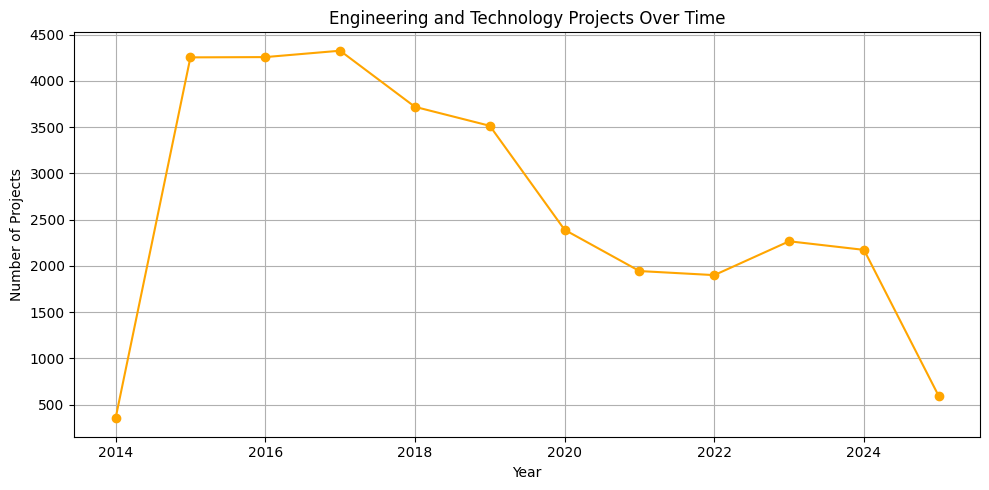

In [9]:
# Filter de juiste categorie
eng_tech = category_per_year[category_per_year['category'] == 'engineering and technology']

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(eng_tech['Year'], eng_tech['project_count'], marker='o', color='orange')
plt.title('Engineering and Technology Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Output-widget
out = Output()

# Alle categorieën
categories = sorted(category_per_year['category'].dropna().unique())

# Dropdown-widget
dropdown = Dropdown(
    options=categories,
    value='engineering and technology',
    description='Categorie:'
)

# Plotfunctie
def create_plot(selected_cat):
    data = category_per_year[category_per_year['category'] == selected_cat]
    fig = px.line(
        data,
        x='Year',
        y='project_count',
        markers=True,
        title=f'{selected_cat.capitalize()} Projects Over Time',
        labels={'project_count': 'Number of Projects'}
    )
    fig.update_layout(
        height=500,
        margin={"r": 0, "t": 50, "l": 0, "b": 0}
    )
    return fig

# Update-functie
def update_plot(change):
    with out:
        out.clear_output(wait=True)
        selected = change['new']
        fig = create_plot(selected)
        display(fig)

# Koppel de update-functie aan dropdown
dropdown.observe(update_plot, names='value')

# UI tonen
display(VBox([dropdown, out]))

# Initieel plot weergeven
with out:
    fig = create_plot(dropdown.value)
    display(fig)


# Funding Distribution 

## Comparison Across countries

### In organization.csv: columns ‘ecContribution’, ‘netEcContribution’

In [11]:
# Look if required columns exist
required_cols = ['country', 'ecContribution', 'netEcContribution']
for col in required_cols:
    if col not in df2020_organization.columns or col not in df2024_organization.columns:
        raise ValueError(f"Column '{col}' not found in one of the datasets")

# Group by country and sum contributions
funding_2020 = df2020_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()
funding_2024 = df2024_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()

# Choose column names
funding_2020.columns = ['country', 'ecContribution_2020', 'netEcContribution_2020']
funding_2024.columns = ['country', 'ecContribution_2024', 'netEcContribution_2024']

# Merge datasets on country
merged_funding = pd.merge(funding_2020, funding_2024, on='country', how='outer').fillna(0)

# Print 
# print("\nFunding distribution comparison (H2020 vs Horizon Europe):")
# print(merged_funding.sort_values(by='ecContribution_2024', ascending=False).to_string(index=False))

merged_funding.to_csv("merged_funding.csv", index=False)

In [12]:
# ISO2 naar ISO3
def convert_iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

# Kaartfunctie
def create_map(data, funding_column):
    data = data.copy()
    data["iso_alpha"] = data["country"].apply(convert_iso2_to_iso3)
    fig = px.scatter_geo(
        data,
        locations="iso_alpha",
        locationmode="ISO-3",
        size=funding_column,
        hover_name="country",
        projection="natural earth",
        title=f"Funding Levels",
        size_max=50
    )
    fig.update_geos(
        showcountries=True,
        countrycolor="LightGray",
        showcoastlines=True,
        coastlinecolor="LightGray",
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        height=600,
    )
    return fig

# Output-widget
out = Output()

# Extract available years from df_organization
df_organization['year'] = pd.to_datetime(df_organization['projectID'].map(
    df_project.set_index('id')['startDate']
), errors='coerce').dt.year
available_years = sorted(df_organization['year'].dropna().unique().astype(int))

# Range sliders for year selection
year_range = widgets.IntRangeSlider(
    value=[min(available_years), max(available_years)],
    min=min(available_years),
    max=max(available_years),
    step=1,
    description='Years:',
    continuous_update=False
)

toggle_contribution = widgets.ToggleButtons(
    options=[
        ('EC Contribution', 'ecContribution'),
        ('Net EC Contribution', 'netEcContribution')
    ],
    description='Type:',
    button_style=''
)

def update_map(change=None):
    with out:
        out.clear_output(wait=True)
        start_year, end_year = year_range.value
        contrib_type = toggle_contribution.value

        # Filter organizations by project start year
        orgs = df_organization[
            (df_organization['year'] >= start_year) &
            (df_organization['year'] <= end_year)
        ]

        # Group by country and sum contributions
        funding = orgs.groupby('country')[contrib_type].sum().reset_index()
        funding.columns = ['country', f'{contrib_type}_sum']
        if funding.empty:
            print("No data for selected period.")
            return
        fig = create_map(funding, f'{contrib_type}_sum')
        fig.update_layout(title=f"{toggle_contribution.label} {start_year}-{end_year}")
        display(fig)

year_range.observe(update_map, names='value')
toggle_contribution.observe(update_map, names='value')

display(VBox([widgets.HBox([year_range, toggle_contribution]), out]))

update_map()

## Network analysis

In [13]:

def country_network_matrices(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts
      • distance_df : 1 – 1/n transformation of network_df
      • norm_df     : distance_df normalised by row+column totals
    Returns the three dataframes in that order.
    """

    # ── 1. Project‑country incidence matrix (binary) ────────────────────────────
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()              # one flag per project–country
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # ── 2. Co‑operation counts between countries (adjacency) ───────────────────
    network_df = incidence.T @ incidence          # matrix multiplication
    np.fill_diagonal(network_df.values, 0)        # remove self‑loops
    network_df = network_df.astype(int)

    # ── 3. Distance matrix: linear with max collaborations ─────────────────────
    max_collab = network_df.values.max()
    if max_collab == 0:
        Exception("No collaborations found in the data.")
    else:
        dissimilarity_df = (max_collab - network_df + 1) / max_collab # +1 to avoid 0 dissimilarity between distinct countries


    # ── 4. Normalised matrix: d_ij / (total_i + total_j) ───────────────────────
    #totals = distance_df.sum(axis=1).to_numpy()          # row sums as 1‑D array
    #denom  = totals[:, None] + totals[None, :]           # outer sum
    #norm    = np.divide(distance_df.values,
    #                    denom,
    #                    out=np.zeros_like(distance_df.values),
    #                    where=denom != 0)                # avoid /0
    #norm_df = pd.DataFrame(norm,
    #                       index=distance_df.index,
    #                       columns=distance_df.columns)

    return network_df, dissimilarity_df


In [14]:
network_df2020, dissimilarity_df2020 = country_network_matrices(df2020_organization)
network_df2024, dissimilarity_df2024 = country_network_matrices(df2024_organization)

In [15]:
network_df2020.to_csv('landen_samenwerking_matrix2020.csv')
network_df2024.to_csv('landen_samenwerking_matrix2024.csv')

Clusteren per 1 jaar 

Trying different distance metrics and filtering out zeroes

In [16]:
def country_network_matrices2(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts
      • distance_df : 1 – 1/n transformation of network_df
    Returns the two dataframes in that order.
    """

    # 1. Project‑country incidence matrix (binary)
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # 2. Co‑operation counts between countries (adjacency)
    network_df = incidence.T @ incidence
    np.fill_diagonal(network_df.values, 0)
    network_df = network_df.astype(int)

    # 3. Distance matrix: 1 - 1/n, handle n=0
    with np.errstate(divide='ignore', invalid='ignore'):
        distance_arr = 1 / network_df.values
        distance_arr[network_df.values == 0] = 1  # Set distance to 1 if no collaboration
    dissimilarity_df = pd.DataFrame(distance_arr, index=network_df.index, columns=network_df.columns)

    return network_df, dissimilarity_df

In [17]:
def country_network_matrices_nonisolated(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts (no isolated countries)
      • distance_df : 1 + 1/n transformation of network_df (no isolated countries)
    Returns the two dataframes in that order.
    """

    # 1. Project‑country incidence matrix (binary)
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # 2. Co‑operation counts between countries (adjacency)
    network_df = incidence.T @ incidence
    np.fill_diagonal(network_df.values, 0)
    network_df = network_df.astype(int)

    # Remove countries (rows/cols) with only zeros
    nonisolated = (network_df.sum(axis=0) > 0) | (network_df.sum(axis=1) > 0)
    network_df = network_df.loc[nonisolated, nonisolated]

    # 3. Distance matrix: 1/(1+n), handle n=0
    with np.errstate(divide='ignore', invalid='ignore'):
        distance_arr = 1 / (1+ network_df.values)
        distance_arr[network_df.values == 0] = 2  # Set distance to 1 if no collaboration
    dissimilarity_df = pd.DataFrame(distance_arr, index=network_df.index, columns=network_df.columns)

    return network_df, dissimilarity_df

In [18]:
def country_network_matrices_nonisolated_maxcollab(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts (no isolated countries)
      • distance_df : (max_collab - n + 1) / max_collab, but set to 2 if no collaboration
    Returns the two dataframes in that order.
    """

    # 1. Project‑country incidence matrix (binary)
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()
                 
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # 2. Co‑operation counts between countries (adjacency)
    network_df = incidence.T @ incidence
    np.fill_diagonal(network_df.values, 0)
    network_df = network_df.astype(int)

    # Remove countries (rows/cols) with only zeros
    nonisolated = (network_df.sum(axis=0) > 0) | (network_df.sum(axis=1) > 0)
    network_df = network_df.loc[nonisolated, nonisolated]

    # 3. Distance matrix: (max_collab - n + 1) / max_collab, set to 2 if n==0
    max_collab = network_df.values.max()
    if max_collab == 0:
        raise Exception("No collaborations found in the data.")
    else:
        dissimilarity_arr = (max_collab - network_df.values + 1) / max_collab
        dissimilarity_arr[network_df.values == 0] = 2  # Set to 2 if no collaboration
        dissimilarity_df = pd.DataFrame(dissimilarity_arr, index=network_df.index, columns=network_df.columns)

    return network_df, dissimilarity_df

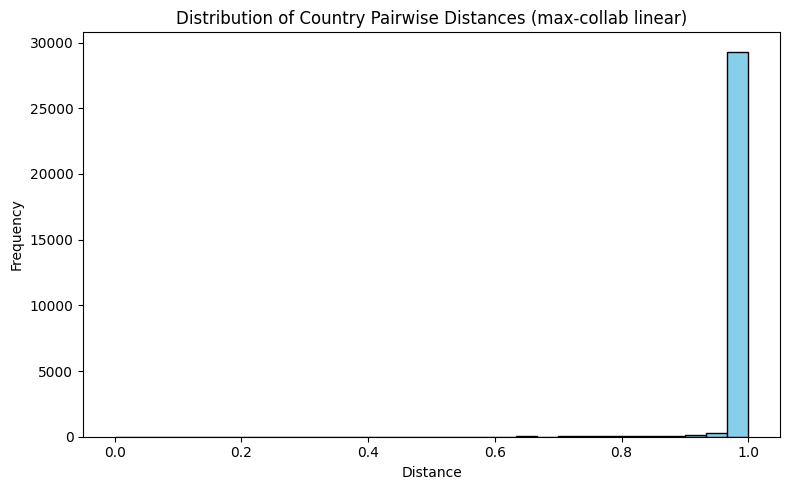

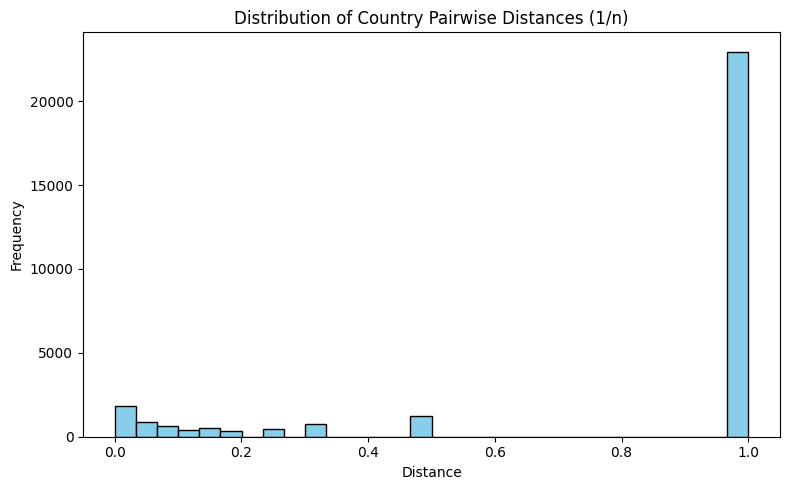

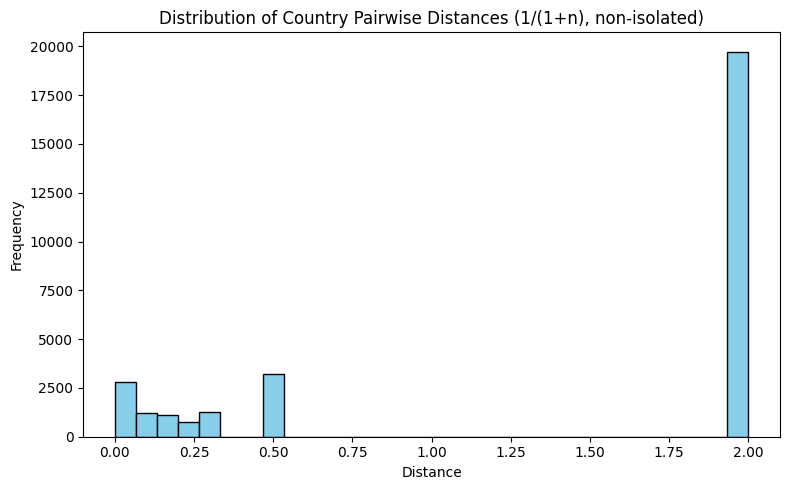

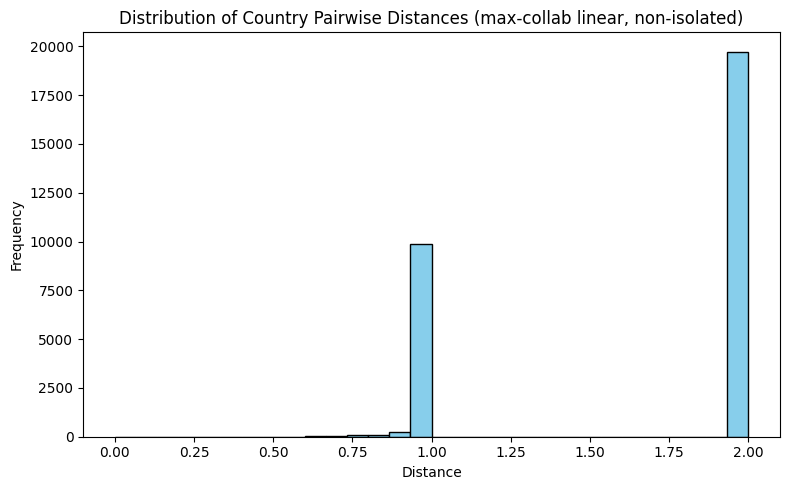

In [19]:
def plot_distance_histogram(distance_func, df, title):
    _, dissimilarity_df = distance_func(df)
    distances = dissimilarity_df.values
    off_diag_distances = distances[~np.eye(distances.shape[0], dtype=bool)]
    plt.figure(figsize=(8, 5))
    plt.hist(off_diag_distances, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# List of (function, title) pairs
distance_metrics = [
    (country_network_matrices, "Distribution of Country Pairwise Distances (max-collab linear)"),
    (country_network_matrices2, "Distribution of Country Pairwise Distances (1/n)"),
    (country_network_matrices_nonisolated, "Distribution of Country Pairwise Distances (1/(1+n), non-isolated)"),
    (country_network_matrices_nonisolated_maxcollab, "Distribution of Country Pairwise Distances (max-collab linear, non-isolated)")
]

for func, title in distance_metrics:
    plot_distance_histogram(func, df_organization, title)


Silhouette plot to determine number of clusters

In [ ]:
def plot_silhouette_for_year(selected_year, min_k=2, max_k=10):
    # Filter organizations for the selected year
    df_project['startDate'] = pd.to_datetime(df_project['startDate'], errors='coerce')
    project_ids = df_project[df_project['startDate'].dt.year == selected_year]['id']
    df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]
    if df_filtered_org.empty:
        print("Geen projecten gevonden voor dit jaar.")
        return

    _, dissimilarity_df = country_network_matrices_nonisolated(df_filtered_org)
    X = dissimilarity_df.values

    silhouette_avgs = []
    Ks = range(min_k, min(max_k, len(X)))
    for k in Ks:
        kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
        labels = kmeans.fit_predict(X)
        if len(set(labels)) == 1:
            silhouette_avgs.append(-1)
        else:
            score = silhouette_score(X, labels, metric='euclidean')
            silhouette_avgs.append(score)

    plt.figure(figsize=(7, 4))
    plt.plot(Ks, silhouette_avgs, marker='o')
    plt.title(f'Silhouette Score per K (year={selected_year})')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Average silhouette score')
    plt.grid(True)
    plt.show()

    # Optional: Silhouette plot for the best K
    best_k = Ks[np.argmax(silhouette_avgs)]
    kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X)
    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10
    plt.figure(figsize=(7, 5))
    for i in range(best_k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.title(f'Silhouette Plot for K={best_k} (year={selected_year})')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster')
    plt.axvline(x=np.mean(sample_silhouette_values), color="red", linestyle="--")
    plt.show()
    print(f"Best K: {best_k} (highest average silhouette score: {max(silhouette_avgs):.3f})")

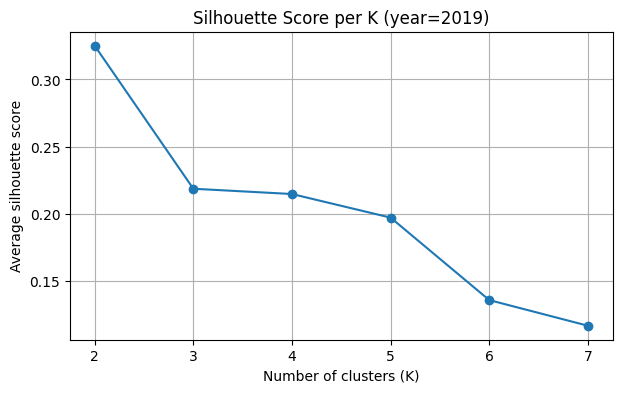

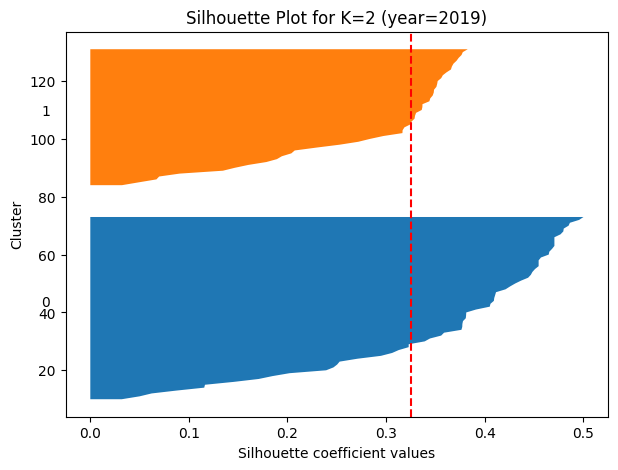

Best K: 2 (highest average silhouette score: 0.325)


In [21]:
# Example: for year 2022
plot_silhouette_for_year(2019, min_k=2, max_k=8)

Clustering: K-Means, HDBScan, Agglomerative

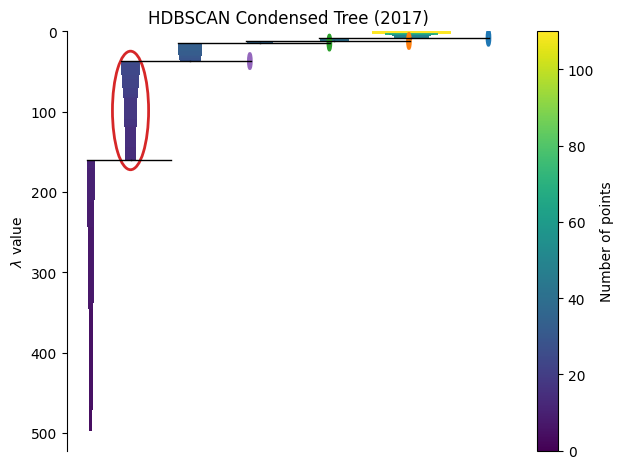

In [ ]:
# HDBSCAN expects a condensed distance matrix

clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)
clusterer.fit(dissimilarity_df.values)

# Plot the condensed tree (dendrogram-like)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.title(f'HDBSCAN Condensed Tree ({selected_year})')
plt.tight_layout()
plt.show()

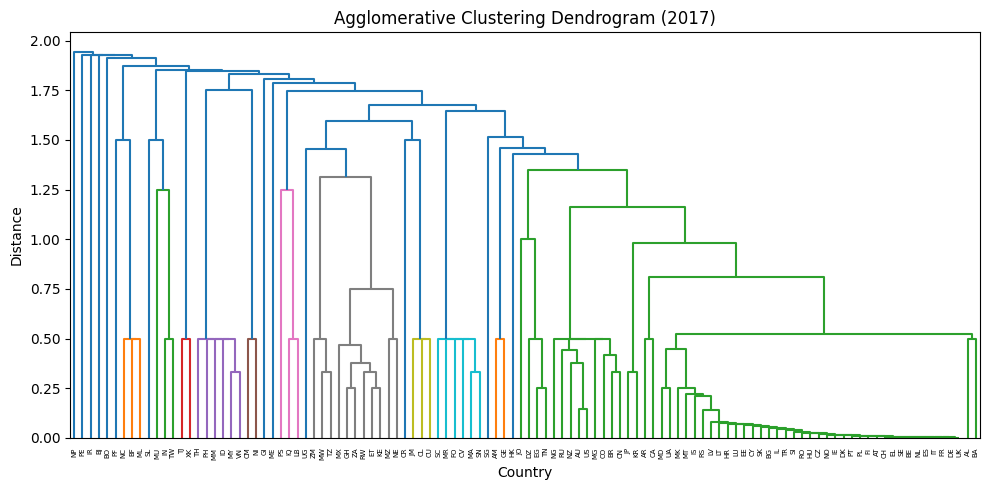

In [38]:
# Agglomerative clustering dendrogram for a selected year
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

selected_year = 2017  # Change as needed

# Prepare dissimilarity matrix for the selected year
df_project['startDate'] = pd.to_datetime(df_project['startDate'], errors='coerce')
project_ids = df_project[df_project['startDate'].dt.year == selected_year]['id']
df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]
_, dissimilarity_df = country_network_matrices_nonisolated(df_filtered_org)

# Convert to condensed distance matrix for linkage
dissimilarity_condensed = squareform(dissimilarity_df.values, checks=False)
Z = linkage(dissimilarity_condensed, method='average')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dissimilarity_df.index.tolist(), leaf_rotation=90)
plt.title(f'Agglomerative Clustering Dendrogram ({selected_year})')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
# Functie om ISO2 → ISO3 om te zetten
def iso2_to_iso3(code: str) -> str | None:
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Clusteringfunctie
def cluster_dataframe(dissimilarity_df: pd.DataFrame, algo, name: str) -> pd.DataFrame:
    if getattr(algo, "metric", None) == "precomputed" or getattr(algo, "affinity", "") == "precomputed":
        algo.fit(dissimilarity_df)
    else:
        algo.fit(dissimilarity_df.values)

    return (
        pd.DataFrame({
            "country": dissimilarity_df.index,
            "cluster": algo.labels_.astype(str)
        })
        .assign(iso_alpha=lambda df: df["country"].map(iso2_to_iso3))
        .dropna(subset=["iso_alpha"])
    )

# Plotfunctie
def cluster_map(df: pd.DataFrame, title: str) -> px.choropleth:
    fig = px.choropleth(
        df,
        locations="iso_alpha",
        color="cluster",
        hover_name="country",
        color_discrete_sequence=px.colors.qualitative.Set3,
        projection="natural earth",
        title=title
    )
    fig.update_geos(showcountries=True, countrycolor="LightGray",
                    showcoastlines=True, coastlinecolor="Gray")
    fig.update_layout(margin=dict(r=0, l=0, t=50, b=0))
    return fig

# Kernfunctie: clustering voor één jaar en methode
def cluster_projects_for_year(selected_year: int, method: str) -> list:
    df_project['startDate'] = pd.to_datetime(df_project['startDate'], errors='coerce')
    project_ids = df_project[df_project['startDate'].dt.year == selected_year]['id']
    df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]

    if df_filtered_org.empty:
        return []

    _, dissimilarity_df = country_network_matrices_nonisolated(df_filtered_org)

    clusterers = {
        "K-means":   KMeans(n_clusters=5, n_init="auto", random_state=42),
        "HDBSCAN":   hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2),
        "Agglomerative": AgglomerativeClustering(n_clusters=5, metric="precomputed", linkage="single"),
    }

    figs = []
    if method in clusterers:
        algo = clusterers[method]
        input_matrix = dissimilarity_df if method == "HDBSCAN" else (1/dissimilarity_df if method == "Spectral" else dissimilarity_df)
        df_clustered = cluster_dataframe(input_matrix, algo, method)
        fig = cluster_map(df_clustered, f"{method} clustering — international cooperation ({selected_year})")
        figs.append(fig)
    return figs

# Unieke jaartallen ophalen
df_combined = df_project.copy()
df_combined['startDate'] = pd.to_datetime(df_combined['startDate'], errors='coerce')
available_years = sorted(df_combined['startDate'].dt.year.dropna().unique().astype(int))

# UI: dropdowns + output
dropdown_year = Dropdown(
    options=available_years,
    value=available_years[0],
    description='Startjaar:'
)

dropdown_method = Dropdown(
    options=['K-means', 'HDBSCAN', 'Agglomerative'],
    value='K-means',
    description='Methode:'
)

out = Output()

def update_plot(change=None):
    with out:
        out.clear_output(wait=True)
        year = dropdown_year.value
        method = dropdown_method.value
        figs = cluster_projects_for_year(year, method)
        if figs:
            for fig in figs:
                display(HTML(fig.to_html(include_plotlyjs='cdn')))
        else:
            print("Geen projecten gevonden voor dit jaar.")

dropdown_year.observe(update_plot, names='value')
dropdown_method.observe(update_plot, names='value')

display(VBox([dropdown_year, dropdown_method, out]))

with out:
    initial_figs = cluster_projects_for_year(dropdown_year.value, dropdown_method.value)
    for fig in initial_figs:
        display(HTML(fig.to_html(include_plotlyjs='cdn')))


## Collaboration Network Graph

In [23]:
from ipywidgets import Dropdown, VBox, Output, Checkbox, HBox, Layout, IntRangeSlider
from IPython.display import display
import plotly.graph_objects as go
from countryinfo import CountryInfo
from sklearn.cluster import KMeans

# Ensure year columns exist
df_project['startYear'] = pd.to_datetime(df_project['startDate'], errors='coerce').dt.year
df_organization['year'] = df_organization['projectID'].map(df_project.set_index('id')['startYear'])

# Year range slider
years = sorted(df_project['startYear'].dropna().unique())
year_range = IntRangeSlider(
    value=[years[0], years[-1]],
    min=years[0],
    max=years[-1],
    step=1,
    description='Years:',
    continuous_update=False
)

dropdown_cluster = Dropdown(description='Cluster:')
out_links = Output()
checkboxes_box = VBox()

def get_lat_lon_from_iso2(iso2):
    try:
        info = CountryInfo(iso2)
        latlng = info.latlng()
        if latlng and len(latlng) == 2:
            return latlng[0], latlng[1]
    except Exception:
        pass
    return None, None

def update_cluster_network(*args):
    start_year, end_year = year_range.value
    # Filter projects and organizations by year range
    project_ids = df_project[(df_project['startYear'] >= start_year) & (df_project['startYear'] <= end_year)]['id']
    df_filtered_org = df_organization[df_organization['projectID'].isin(project_ids)]

    if df_filtered_org.empty:
        with out_links:
            out_links.clear_output()
            print("No data for selected period.")
        checkboxes_box.children = []
        dropdown_cluster.options = []
        return

    # Recompute network and clusters for selected years
    network_df, dissimilarity_df = country_network_matrices(df_filtered_org)
    clusters_df = cluster_dataframe(dissimilarity_df, KMeans(n_clusters=5, n_init="auto", random_state=42), "K-means")

    # Update cluster dropdown options
    cluster_options = sorted(clusters_df['cluster'].unique())
    dropdown_cluster.options = cluster_options
    dropdown_cluster.value = cluster_options[0] if cluster_options else None

    def plot_cluster_links(selected_cluster, visible_countries=None):
        with out_links:
            out_links.clear_output(wait=True)
            countries = clusters_df[clusters_df['cluster'] == selected_cluster]['country'].tolist()
            if len(countries) < 2:
                print("Not enough countries in this cluster to show links.")
                return

            coords = {}
            for c in countries:
                lat, lon = get_lat_lon_from_iso2(c)
                if lat is not None and lon is not None:
                    coords[c] = (lat, lon)
            valid_countries = [c for c in countries if c in coords]

            if visible_countries is None:
                visible_countries = set(valid_countries)
            else:
                visible_countries = set(visible_countries)

            lines = []
            max_weight = 0
            for i, c1 in enumerate(valid_countries):
                for j, c2 in enumerate(valid_countries):
                    if j <= i:
                        continue
                    if c1 not in visible_countries or c2 not in visible_countries:
                        continue
                    weight = network_df.loc[c1, c2]
                    if weight > 0:
                        max_weight = max(max_weight, weight)
                        lines.append({
                            'from': c1,
                            'to': c2,
                            'weight': weight,
                            'from_lat': coords[c1][0],
                            'from_lon': coords[c1][1],
                            'to_lat': coords[c2][0],
                            'to_lon': coords[c2][1],
                        })

            lats = [coords[c][0] for c in valid_countries if c in visible_countries]
            lons = [coords[c][1] for c in valid_countries if c in visible_countries]
            names = [c for c in valid_countries if c in visible_countries]

            fig = go.Figure()
            for link in lines:
                width = max(1, link['weight'] / max_weight * 10)
                fig.add_trace(go.Scattergeo(
                    lon=[link['from_lon'], link['to_lon']],
                    lat=[link['from_lat'], link['to_lat']],
                    mode='lines',
                    line=dict(width=width, color='orange'),
                    opacity=0.7,
                    showlegend=False,
                    hoverinfo='skip'
                ))
            fig.add_trace(go.Scattergeo(
                lon=lons,
                lat=lats,
                mode='markers+text',
                marker=dict(size=10, color='blue'),
                text=names,
                textposition="top center",
                hoverinfo='text'
            ))
            fig.update_geos(
                showcountries=True,
                countrycolor="LightGray",
                showcoastlines=True,
                coastlinecolor="Gray",
                projection_type="natural earth"
            )
            fig.update_layout(
                title=f"Collaboration Links in Cluster {selected_cluster} ({start_year}-{end_year})",
                height=600,
                margin=dict(r=0, l=0, t=50, b=0)
            )
            display(fig)

    def update_checkboxes(selected_cluster):
        countries = clusters_df[clusters_df['cluster'] == selected_cluster]['country'].tolist()
        coords = {}
        for c in countries:
            lat, lon = get_lat_lon_from_iso2(c)
            if lat is not None and lon is not None:
                coords[c] = (lat, lon)
        valid_countries = [c for c in countries if c in coords]
        checkboxes = [Checkbox(value=True, description=c, indent=False, layout=Layout(width='200px')) for c in valid_countries]
        checkboxes_box.children = checkboxes

        def on_checkbox_change(change):
            visible_countries = [cb.description for cb in checkboxes if cb.value]
            plot_cluster_links(selected_cluster, visible_countries)

        for cb in checkboxes:
            cb.observe(on_checkbox_change, names='value')
        plot_cluster_links(selected_cluster, valid_countries)

    dropdown_cluster.observe(lambda change: update_checkboxes(change['new']), names='value')
    if dropdown_cluster.value is not None:
        update_checkboxes(dropdown_cluster.value)
    else:
        checkboxes_box.children = []
        with out_links:
            out_links.clear_output()
            print("No clusters for selected period.")

# Observe year slider
year_range.observe(update_cluster_network, names='value')

# Initial UI
display(VBox([year_range, dropdown_cluster, checkboxes_box, out_links]))
update_cluster_network()

## Research Impact

In [24]:
import pandas as pd
import plotly.express as px
from ipywidgets import Output, Dropdown, VBox
from IPython.display import display

# Load the publications data with citation counts
df_pubs = pd.read_csv('updated_publications_with_citations_2024.csv')

# Merge to get the research category for each publication using df_euroSciVoc
# First, ensure 'projectID' and 'category' are present in df_euroSciVoc
if 'projectID' not in df_euroSciVoc.columns or 'category' not in df_euroSciVoc.columns:
    raise ValueError("df_euroSciVoc must have 'projectID' and 'category' columns.")

df_pubs['projectID'] = df_pubs['projectID'].astype(str)
df_euroSciVoc['projectID'] = df_euroSciVoc['projectID'].astype(str)
# Merge publications with project categories
df_pubs_cat = pd.merge(df_pubs, df_euroSciVoc[['projectID', 'category']], on='projectID', how='left')

# Use publishedYear as 'Year'
df_pubs_cat['Year'] = pd.to_numeric(df_pubs_cat['publishedYear'], errors='coerce').astype('Int64')

# Prepare data: count publications and sum citations per category per year
category_year_stats = (
    df_pubs_cat
    .groupby(['category', 'Year'])
    .agg(
        publication_count=('id', 'count'),
        total_citations=('citation_count', 'sum')
    )
    .reset_index()
)

# Widget output
out = Output()

# All categories
categories = sorted(category_year_stats['category'].dropna().unique())

# Dropdown widget
dropdown = Dropdown(
    options=categories,
    value=categories[0] if categories else None,
    description='Categorie:'
)

# Plot function
def create_plot(selected_cat):
    data = category_year_stats[category_year_stats['category'] == selected_cat]
    fig = px.line(
        data,
        x='Year',
        y='publication_count',
        markers=True,
        title=f'{selected_cat.capitalize()} Publications Over Time',
        labels={'publication_count': 'Number of Publications'}
    )
    # Add citations as secondary y-axis
    fig.add_bar(
        x=data['Year'],
        y=data['total_citations'],
        name='Total Citations',
        yaxis='y2',
        marker_color='orange',
        opacity=0.5
    )
    fig.update_layout(
        height=500,
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        yaxis=dict(title='Number of Publications'),
        yaxis2=dict(
            title='Total Citations',
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.01, y=0.99)
    )
    return fig

# Update function
def update_plot(change):
    with out:
        out.clear_output(wait=True)
        selected = change['new']
        fig = create_plot(selected)
        display(fig)

# Link update function to dropdown
dropdown.observe(update_plot, names='value')

# Show UI
display(VBox([dropdown, out]))

# Initial plot
with out:
    if categories:
        fig = create_plot(dropdown.value)
        display(fig)
    else:
        print("No categories available.")

In [25]:
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display

import plotly.express as px

# Ensure df_pubs_cat is available (from cell 25)
# It should have columns: 'category', 'Year', 'citation_count'

# Prepare data: sum citations per category per year
citations_per_topic_year = (
    df_pubs_cat
    .groupby(['Year', 'category'])
    .agg(total_citations=('citation_count', 'sum'))
    .reset_index()
)

# Dropdown for year selection
years_available = sorted(citations_per_topic_year['Year'].dropna().unique())
dropdown_year = Dropdown(
    options=years_available,
    value=years_available[0] if years_available else None,
    description='Year:'
)

out_pie = Output()

def plot_pie(selected_year):
    data = citations_per_topic_year[citations_per_topic_year['Year'] == selected_year]
    if data.empty:
        fig = None
    else:
        fig = px.pie(
            data,
            names='category',
            values='total_citations',
            title=f'Citations by Research Topic in {selected_year}',
            hole=0.3
        )
        fig.update_traces(textinfo='percent+label')
    return fig

def update_pie(change):
    with out_pie:
        out_pie.clear_output(wait=True)
        fig = plot_pie(change['new'])
        if fig:
            display(fig)
        else:
            print("No data for this year.")

dropdown_year.observe(update_pie, names='value')

display(VBox([dropdown_year, out_pie]))

# Initial plot
with out_pie:
    fig = plot_pie(dropdown_year.value)
    if fig:
        display(fig)
    else:
        print("No data for this year.")

## Explanatory Data analysis

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Optional: add a 'Year' column for convenience
df_pubs_cat['Year'] = pd.to_numeric(df_pubs_cat['publishedYear'], errors='coerce').astype('Int64')

# 1. Aggregate total citations per project
project_citations = (
    df_pubs_cat.groupby('projectID')
    .agg(total_citations=('citation_count', 'sum'))
    .reset_index()
)

# 2. Get funding, coordinator country, and research category for each project
# Funding: sum ecContribution per project
project_funding = (
    df_organization.groupby('projectID')['ecContribution'].sum().reset_index()
)

# Coordinator country: take the country where role == 'coordinator'
coordinator_country = (
    df_organization[df_organization['role'].str.lower() == 'coordinator']
    .groupby('projectID')['country'].first().reset_index()
)

# Research category: take the first category for each project
project_category = (
    df_euroSciVoc.groupby('projectID')['category'].first().reset_index()
)

# Years since publication (as of 28.06.2023)
dataset_update_date = datetime(2023, 6, 28)
project_year = (
    df_pubs_cat.groupby('projectID')['publishedYear']
    .min()
    .reset_index()
    .rename(columns={'publishedYear': 'first_publication_year'})
)
project_year['projectID'] = project_year['projectID'].astype(str)
project_year['first_publication_year'] = pd.to_numeric(project_year['first_publication_year'], errors='coerce')
project_year['years_since_publication'] = (
    dataset_update_date.year - project_year['first_publication_year']
)

# Ensure projectID is string in all relevant DataFrames
project_citations['projectID'] = project_citations['projectID'].astype(str)
project_funding['projectID'] = project_funding['projectID'].astype(str)
coordinator_country['projectID'] = coordinator_country['projectID'].astype(str)
project_category['projectID'] = project_category['projectID'].astype(str)

# Merge all features
df_reg = project_citations.merge(project_funding, on='projectID', how='left') \
    .merge(coordinator_country, on='projectID', how='left') \
    .merge(project_category, on='projectID', how='left') \
    .merge(project_year[['projectID', 'years_since_publication']], on='projectID', how='left')

# Drop rows with missing values in any explanatory variable
df_reg = df_reg.dropna(subset=['ecContribution', 'country', 'category', 'total_citations', 'years_since_publication'])
df_reg = df_reg[df_reg['years_since_publication'] >= 0]

# Remove outliers
outliers = df_reg[(df_reg['total_citations'] > 13000) & (df_reg['ecContribution'] > 3e8)]
print("Outlier projects:\n", outliers[['projectID', 'total_citations', 'ecContribution']])
df_reg = df_reg[~df_reg['projectID'].isin(outliers['projectID'])]
df_reg = df_reg.reset_index(drop=True)

# 3. Prepare features and response
X = df_reg[['ecContribution', 'country', 'category', 'years_since_publication']]
y = df_reg['total_citations']

# 4. Build regression pipeline with one-hot encoding for categorical variables
categorical_features = ['country', 'category']
numeric_features = ['ecContribution', 'years_since_publication']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

reg_pipe = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

# 5. Fit model
reg_pipe.fit(X, y)

# 6. ANOVA-like summary: show coefficients
feature_names = reg_pipe.named_steps['pre'].get_feature_names_out()
coefs = reg_pipe.named_steps['reg'].coef_
intercept = reg_pipe.named_steps['reg'].intercept_

print("Intercept:", intercept)
print("Coefficients:")
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.3f}")

# 7. Plot: Citations vs Funding with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ecContribution', y='total_citations', data=df_reg, alpha=0.5)
sns.regplot(x='ecContribution', y='total_citations', data=df_reg, scatter=False, color='red')
plt.title('Total Citations per Project vs Funding')
plt.xlabel('Funding (ecContribution)')
plt.ylabel('Total Citations')
plt.tight_layout()
plt.show()

# 8. Plot: Citations by Research Category (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='total_citations', data=df_reg)
plt.title('Total Citations per Project by Research Category')
plt.xlabel('Research Category')
plt.ylabel('Total Citations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Plot: Citations by Coordinator Country (top 10 countries)
top_countries = df_reg['country'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.boxplot(x='country', y='total_citations', data=df_reg[df_reg['country'].isin(top_countries)])
plt.title('Total Citations per Project by Coordinator Country (Top 10)')
plt.xlabel('Coordinator Country')
plt.ylabel('Total Citations')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from ipywidgets import Dropdown, VBox, Output
from IPython.display import display

# Prepare dropdown options
topic_options = sorted(df_reg['category'].dropna().unique())
country_options = sorted(df_reg['country'].dropna().unique())

dropdown_topic = Dropdown(
    options=topic_options,
    value=topic_options[0],
    description='Research Topic:'
)
dropdown_country = Dropdown(
    options=country_options,
    value=country_options[0],
    description='Coordinator Country:'
)
out_funding_citations = Output()

def plot_funding_vs_citations(topic, country):
    data = df_reg[(df_reg['category'] == topic) & (df_reg['country'] == country)]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='ecContribution', y='total_citations', data=data, alpha=0.6)
    if not data.empty:
        sns.regplot(x='ecContribution', y='total_citations', data=data, scatter=False, color='red')
    plt.title(f'Citations vs Funding\n{topic} / {country}')
    plt.xlabel('Funding (ecContribution)')
    plt.ylabel('Total Citations')
    plt.tight_layout()
    plt.show()

def update_plot(change=None):
    with out_funding_citations:
        out_funding_citations.clear_output(wait=True)
        plot_funding_vs_citations(dropdown_topic.value, dropdown_country.value)

dropdown_topic.observe(update_plot, names='value')
dropdown_country.observe(update_plot, names='value')

display(VBox([dropdown_topic, dropdown_country, out_funding_citations]))
update_plot()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import statsmodels.api as sm

# 1. Model fit metrics (R^2, RMSE) on training data
y_pred = reg_pipe.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"R^2 (training): {r2:.3f}")
print(f"RMSE (training): {rmse:.2f}")

# 2. Statistical significance of coefficients using statsmodels
# Prepare design matrix with one-hot encoding (same as pipeline)
X_enc = reg_pipe.named_steps['pre'].transform(X)
X_enc = np.asarray(X_enc)
X_enc = sm.add_constant(X_enc)
model = sm.OLS(y, X_enc)
results = model.fit()

# Print summary table (coefficients, std err, t, p-values)
feature_names_full = ['Intercept'] + list(feature_names)
summary_df = (
    pd.DataFrame({
        'feature': feature_names_full,
        'coef': results.params,
        'std_err': results.bse,
        't': results.tvalues,
        'p_value': results.pvalues
    })
)
print(summary_df)

# Show which coefficients are significant at alpha=0.05
significant = summary_df[summary_df['p_value'] < 0.05]
print("\nSignificant predictors (p < 0.05):")
print(significant[['feature', 'coef', 'p_value']])

# Optionally, display full statsmodels summary
display(results.summary())

R^2 (training): 0.045
RMSE (training): 424.08
                                         feature        coef     std_err  \
const                                  Intercept   34.418533   84.210175   
x1                               cat__country_BE  -51.326451   69.245302   
x2                               cat__country_BG  -55.655771  254.158408   
x3                               cat__country_CH   62.632550  221.091924   
x4                               cat__country_CY  -35.956132  146.110367   
x5                               cat__country_CZ  -24.014323   99.327033   
x6                               cat__country_DE   23.766308   59.236393   
x7                               cat__country_DK   39.935577   71.906553   
x8                               cat__country_EE   -8.556459  161.312035   
x9                               cat__country_EL  -36.788720   67.272486   
x10                              cat__country_ES   16.911091   60.225388   
x11                              cat__coun

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total_citations   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.341
Date:                Thu, 22 May 2025   Prob (F-statistic):           3.09e-06
Time:                        06:11:42   Log-Likelihood:                -15774.
No. Observations:                2112   AIC:                         3.163e+04
Df Residuals:                    2069   BIC:                         3.188e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4185     84.210      0.409      0.683    -130.727     199.564
x1           -51.3265     69.245     -0.741      0.459    -187.124      84.471
x2           -55.6558    254.158     -0.219      0.827    -554.089     442.777
x3            62.6325    221.092      0.283      0.777    -370.953     496.218
x4           -35.9561    146.110     -0.246      0.806    -322.495     250.583
x5           -24.0143     99.327     -0.242      0.809    -218.806     170.777
x6            23.7663     59.236      0.401      0.688     -92.403     139.935
x7            39.9356     71.907      0.555      0.579    -101.081     180.952
x8            -8.5565    161.312     -0.053      0.958    -324.907     307.794
x9           -36.7887     67.272     -0.547      0.585    -168.718      95.140
x10           16.9111     60.225      0.281      0.779    -101.198     135.020
x11          -53.9866     76.499     -0.706      0.480    -204.009      96.036
x12         -143.1277    436.833     -0.328      0.743    -999.806     713.551
x13          -14.9847     61.234     -0.245      0.807    -135.071     105.101
x14          123.7962    253.341      0.489      0.625    -373.033     620.625
x15           21.4136    170.794      0.125      0.900    -313.532     356.359
x16           25.1965     85.534      0.295      0.768    -142.545     192.938
x17          -34.6411     77.295     -0.448      0.654    -186.226     116.943
x18          -79.1571    170.901     -0.463      0.643    -414.312     255.998
x19           26.5529     60.275      0.441      0.660     -91.654     144.760
x20          -77.4885    221.084     -0.350      0.726    -511.058     356.081
x21          -44.9067    126.727     -0.354      0.723    -293.432     203.619
x22           84.2054    308.258      0.273      0.785    -520.324     688.735
x23          -32.3935    436.621     -0.074      0.941    -888.656     823.869
x24          215.5759    253.954      0.849      0.396    -282.455     713.607
x25           -2.2228     62.861     -0.035      0.972    -125.500     121.055
x26          -63.5406     79.578     -0.798      0.425    -219.602      92.521
x27          -26.4799    120.137     -0.220      0.826    -262.083     209.123
x28           -8.0180     77.495     -0.103      0.918    -159.995     143.959
x29          -83.6050    146.193     -0.572      0.567    -370.305     203.095
x30          -42.2328    140.225     -0.301      0.763    -317.229     232.764
x31           33.7918     72.523      0.466      0.641    -108.435     176.018
x32          -44.7617    135.226     -0.331      0.741    -309.956     220.432
x33          -70.5231    307.926     -0.229      0.819    -674.401     533.355
x34           92.4262    161.579      0.572      0.567    -224.448     409.300
x35         -122.3389    253.487     -0.483      0.629    -619.455     374.777
x3

Included categories (5): ['natural sciences', 'engineering and technology', 'social sciences', 'medical and health sciences', 'humanities']
Included countries (14): ['DE', 'ES', 'IT', 'FR', 'NL', 'EL', 'BE', 'DK', 'SE', 'AT', 'FI', 'IL', 'PT', 'NO']
Filtered dataset shape: (1878, 6)


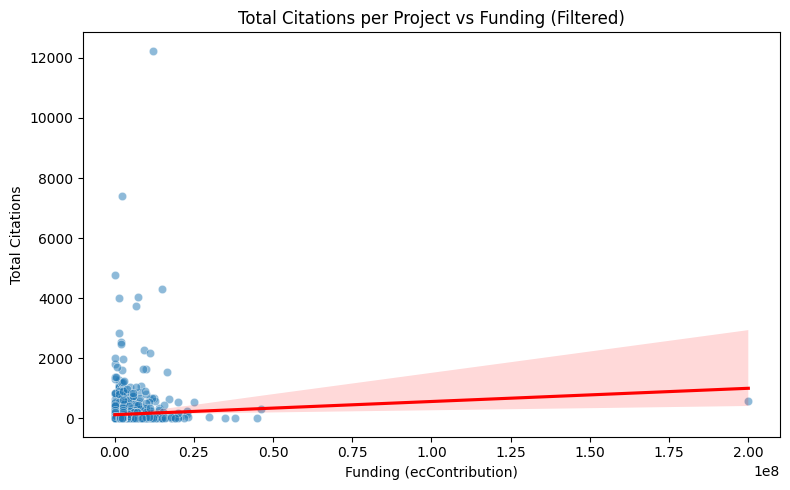

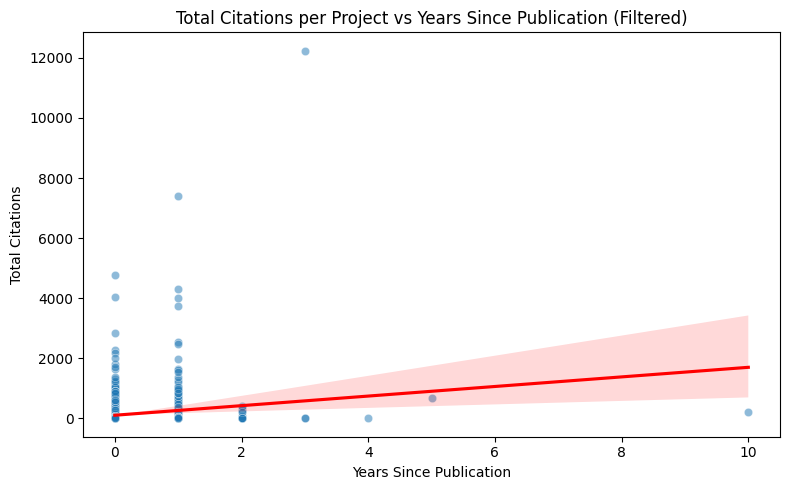

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Filter categories and countries with at least 50 projects
category_counts = df_reg['category'].value_counts()
country_counts = df_reg['country'].value_counts()
valid_categories = category_counts[category_counts >= 50].index
valid_countries = country_counts[country_counts >= 50].index

df_reg_filtered = df_reg[
    df_reg['category'].isin(valid_categories) &
    df_reg['country'].isin(valid_countries)
].copy()

print(f"Included categories ({len(valid_categories)}): {list(valid_categories)}")
print(f"Included countries ({len(valid_countries)}): {list(valid_countries)}")
print(f"Filtered dataset shape: {df_reg_filtered.shape}")

# 2. Prepare features and response (exclude category/country as predictors)
X = df_reg_filtered[['ecContribution', 'years_since_publication']]
y = df_reg_filtered['total_citations']

# 3. Build and fit regression model (no categorical variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['ecContribution', 'years_since_publication'])
    ]
)
reg_pipe = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])
reg_pipe.fit(X, y)

# 4. Plot: Citations vs Funding with regression line (filtered data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ecContribution', y='total_citations', data=df_reg_filtered, alpha=0.5)
sns.regplot(x='ecContribution', y='total_citations', data=df_reg_filtered, scatter=False, color='red')
plt.title('Total Citations per Project vs Funding (Filtered)')
plt.xlabel('Funding (ecContribution)')
plt.ylabel('Total Citations')
plt.tight_layout()
plt.show()

# 5. Plot: Citations vs Years Since Publication (filtered data)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='years_since_publication', y='total_citations', data=df_reg_filtered, alpha=0.5)
sns.regplot(x='years_since_publication', y='total_citations', data=df_reg_filtered, scatter=False, color='red')
plt.title('Total Citations per Project vs Years Since Publication (Filtered)')
plt.xlabel('Years Since Publication')
plt.ylabel('Total Citations')
plt.tight_layout()
plt.show()